## Project - Neural Networks - Part 4

## 1 Import the data.

Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Checking the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

Let us now, load the dataset that is available as a .h5 file

In [4]:
import h5py

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Data/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## 2. Data pre-processing & visualisation

In [5]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

Checking few contents of features and labels of one example from the images

In [6]:
X_train[:1]    

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [7]:
y_train[:1]

array([2], dtype=uint8)

In [8]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [9]:
y_test[:1]

array([1], dtype=uint8)

Visualising the first 10 images in the dataset.

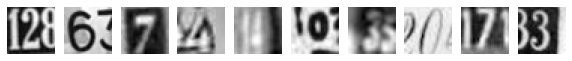

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

Checking the shape of the data

In [11]:
X_train.shape

(42000, 32, 32)

In [12]:
y_train.shape

(42000,)

Need to reshape the X_train and X_test so that the same can be fed for model building. Currently we have a 3D tensor and we need to feed a 2D tensor into the model.

- We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255


In [13]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


Encoding the target variables. We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [14]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10




```
# This is formatted as code
```

## 3. Designing, training, tuning and testing a neural network image classifier.

#### Building the neural network model, fitting the training data, testing it and providing model summary. 

In [15]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

Creating an object of our model

In [16]:
# build the model
model = nn_model()

In [17]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)

### Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

Fitting the model on the training dataset along with it's equivalent one hot encoded labels

In [18]:
# Fitting the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 4s - loss: 2.3015 - accuracy: 0.1086 - val_loss: 2.2705 - val_accuracy: 0.1313
Epoch 2/100
140/140 - 0s - loss: 2.1670 - accuracy: 0.1952 - val_loss: 1.9661 - val_accuracy: 0.2987
Epoch 3/100
140/140 - 0s - loss: 1.7231 - accuracy: 0.4030 - val_loss: 1.5149 - val_accuracy: 0.4902
Epoch 4/100
140/140 - 0s - loss: 1.4136 - accuracy: 0.5320 - val_loss: 1.2990 - val_accuracy: 0.5783
Epoch 5/100
140/140 - 0s - loss: 1.2865 - accuracy: 0.5821 - val_loss: 1.2255 - val_accuracy: 0.6043
Epoch 6/100
140/140 - 0s - loss: 1.1954 - accuracy: 0.6179 - val_loss: 1.1652 - val_accuracy: 0.6282
Epoch 7/100
140/140 - 0s - loss: 1.1394 - accuracy: 0.6398 - val_loss: 1.1142 - val_accuracy: 0.6457
Epoch 8/100
140/140 - 0s - loss: 1.0855 - accuracy: 0.6588 - val_loss: 1.0712 - val_accuracy: 0.6641
Epoch 9/100
140/140 - 0s - loss: 1.0450 - accuracy: 0.6740 - val_loss: 1.0296 - val_accuracy: 0.6799
Epoch 10/100
140/140 - 0s - loss: 1.0166 - accuracy: 0.6837 - val_loss: 1.0040 - val_accura

## 4. Plotting the training loss, validation loss vs number of epochs and training accuracy, 
## validation accuracy vs number of epochs plot

In [19]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6920722126960754
Accuracy: 0.804722249507904


Text(0.5, 1.0, 'Training and validation loss')

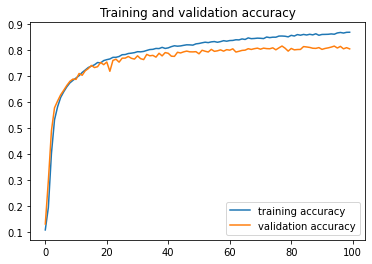

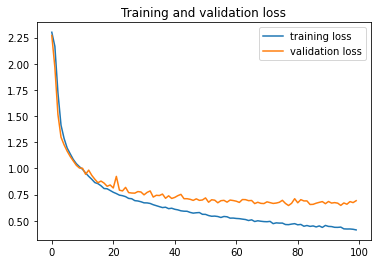

In [20]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 80.74 %. 

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.
